![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
print("Promedios")
print(bikes.groupby('season').total.mean())
print("Sumas")
print(bikes.groupby('season').total.sum())
print("Desviación estandar")
print(bikes.groupby('season').total.std())
print("Mínimo")
print(bikes.groupby('season').total.min())
print("Máximo")
print(bikes.groupby('season').total.max())
print("Cuartiles")
print(bikes.groupby('season').total.quantile([.25, .5, 0.75]))

Promedios
season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64
Sumas
season
1    312498
2    588282
3    640662
4    544034
Name: total, dtype: int64
Desviación estandar
season
1    125.273974
2    192.007843
3    197.151001
4    177.622409
Name: total, dtype: float64
Mínimo
season
1    1
2    1
3    1
4    1
Name: total, dtype: int64
Máximo
season
1    801
2    873
3    977
4    948
Name: total, dtype: int64
Cuartiles
season      
1       0.25     24.0
        0.50     78.0
        0.75    164.0
2       0.25     49.0
        0.50    172.0
        0.75    321.0
3       0.25     68.0
        0.50    195.0
        0.75    347.0
4       0.25     51.0
        0.50    161.0
        0.75    294.0
Name: total, dtype: float64


###### Promedios:
Durante la época de verano es cuando se encuentra una mayor tendencia a alquilar bicicletas. Teniendo en cuenta que cada fila representa una hora y un día, entonces el promedio obtenido indica que en verano se tienden a alquilar 234 bicicletas por hora. En cambio, en invierno, la tendencia es a alquilar 116 bicicletas por hora, siendo este el menor número obtenido.

###### Sumas:

En total, los registros históricos de esta base de datos muestran que en invierno se han hecho un total de 312498 alquileres, en primavera se han realizado 588282, en verano 640662 y en otoño 5444034.

###### Desviación estandar

En términos de alquileres, también es el verano la época en la cual hay una mayor dispersión. Esto quiere decir que hay mayor variabiabilidad en el número de bicicletas que se alquila por hora durante esta época. En cambio, en invierno es la época en la que hay mayor homogeneidad, debido a su menor desviación estandar.

###### Mínimo

Durante cualquiera de las estaciones, mínimo se tuvo un alquiler de una bicicleta por hora.

###### Máximo

En invierno, el número máximo de alquileres que se alcanzó fue de 801 bicicletas. En primavera este número ascendió a 873, en verano a 977 y en otoño a 948. De esta forma el número máximo de alquileres en este sistema en una hora fue de 977 y ocurrió en verano.

###### Cuartiles

Durante invierno, en el 25% de las ocasiones se alquilaron 24 bicicletas o menos, en el 50% de los casos se alquilaron 78 y en el 75% de los casos 164 o menos.
Durante primavera, en el 25% de las ocasiones se alquilaron 49 bicicletas o menos, en el 50% de los casos se alquilaron 172 y en el 75% de los casos 321 o menos.
Durante verano, en el 25% de las ocasiones se alquilaron 68 bicicletas o menos, en el 50% de los casos se alquilaron 195 y en el 347% de los casos 164 o menos.
Durante otoño, en el 25% de las ocasiones se alquilaron 51 bicicletas o menos, en el 50% de los casos se alquilaron 161 y en el 75% de los casos 294 o menos.


In [5]:
# Celda 1.2
print("Promedios")
print(bikes.groupby('hour').total.mean())
print("Sumas")
print(bikes.groupby('hour').total.sum())
print("Desviación estandar")
print(bikes.groupby('hour').total.std())
print("Mínimo")
print(bikes.groupby('hour').total.min())
print("Máximo")
print(bikes.groupby('hour').total.max())
print("Cuartiles")
print(bikes.groupby('hour').total.quantile([.25, .5, 0.75]))

Promedios
hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64
Sumas
hour
0      25088
1      15372
2      10259
3       5091
4       2832
5       8935
6      34698
7      96968
8     165060
9     100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: total, dtype: int64
Desviación estandar
hour
0      43.620012
1      34.112105
2      26.110267
3      12.666442
4       4.217633
5      12.784293
6      54.745333
7     159.207044
8     231.723065
9      92.099209
10   

###### Promedios

Los promedios indican que durante las primeras horas del día hay pocos alquileres de bicicletas. La tendencia aumenta entre 7 y 8 de la mañana, siendo estas las horas pico matutinas, posiblemente debido a que, a estas horas tanto trabajadores como estudiantes pueden usar este servicio para desplazarse hacia sus actividades. En la tarde, las horas pico se encuentran entre 4 pm y 7 pm. La hora con mayor tendencia de uso es las 5 pm.

###### Sumas

La hora en la que históricamente se han realizado menos alquileres es a las 4 am, con un total de 2832. En cambio, la hora con mayor número de alquileres es las 5 pm con  213757 en total.

##### Desviación estandar

La heterogeneidad en el alquiler de bicicletas por hora se aumenta cuando se aumenta la tendencia. Es decir que en las horas en las que más se usa este servicio son también las horas en las que se presenta mayor variabilidad.

##### Mínimo
En todas las horas, como mínimo se ha realizado el alquiler de una bicicleta. A las 6 pm, que es parte de la hora pico, el día con menos alquiler de bicicletas se alcanzó un total de 23 servicios.

##### Máximo

El mayor número de alquileres en una hora fue de 977 y ocurrió a las 6 pm.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

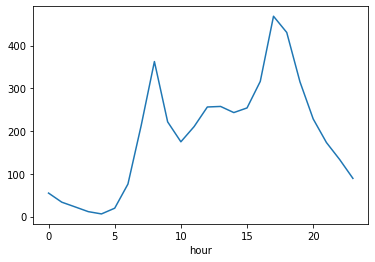

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

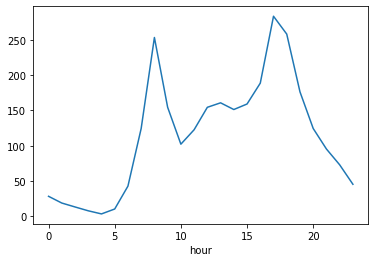

In [7]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour')['total'].mean().plot()

<AxesSubplot:xlabel='hour'>

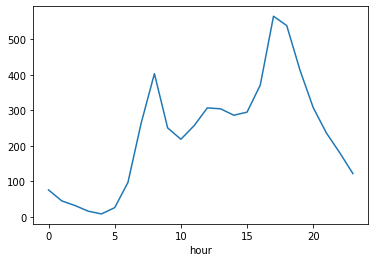

In [8]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour')['total'].mean().plot()

Los gráficos refuerzan el resultado obtenido con las medias condicionales en la sección previa. En este caso, se observa que, ya sea en general, en invierno o en verano, hay una hora pico matutina alrededor de las 7 y 8 am. En la tarde, estas horas pico están entre las 4 y las 7 pm, alcanzando un máximo a las 5 pm. También se evidencia que el número de alquileres, independientemente de la hora es mucho mayor en verano que en invierno.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [9]:
# Celda 3
X = bikes[["season", "hour"]]
dummies = pd.get_dummies(bikes['season'], prefix='season', drop_first=True)
X= pd.concat([X, dummies], axis=1)
X = X.drop('season', axis=1)
y = bikes["total"]

model = LinearRegression()
model.fit(X, y)

r_sq = model.score(X, y)
print(f"Coeficiente de determinación: {r_sq}")
print(f"Intercepto: {model.intercept_}")
print(f"Pendientes: {model.coef_}")

Coeficiente de determinación: 0.22339339904452493
Intercepto: -6.430262462306132
Pendientes: [ 10.54520609 100.31723192 119.46754995  84.08311787]


###### Interpretación de los resultados 

1. El coeficiente de determinación indica que con este modelo es posible explicar el 22,34% de las variaciones que se presentan en el total de alquiler de bicicletas.

2. El intercepto es igual a -6.43. En este caso, este intercepto indicaría que si la variable hora es igual a cero y si las dummy de estaciones son iguales a cero, se esperaría un total de alquiler igual a -6.43 en promedio. Este sería entonces el promedio estimado para la hora cero en invierno (teniendo en cuenta que las dummy que se incluyeron en el modelo son las de verano, primavera y otoño). Este resultado no tiene mucho sentido debido al valor negativo, pero se pudo haber presentado debido a las limitaciones del modelo que se comentarán más adelante.

3. La pendiente obtenida para la variable hora indica que, conforme avanza el día, por cada hora adicional, el alquiler de bicicletas tiende a aumentar en 10.54 unidades. Ya que el invierno representa el cero de las tres dummy, entonces se tiene que: en primavera se tiende a tener un alquiler de bicicletas mayor en 100.32 unidades que en invierno. En verano se tiende a tener un alquiler superior en 119.47 unidades superior con respecto al invierno. En primavera, el alquiler tiende a ser superior al del invierno en 84.08 unidades.

###### Limitaciones.

1. Si se desea utilizar este modelo con fines predictivos, el coeficiente de determinación es bajo.
2. La variable dependiente no es una variable continua. Es un conteo, razón por la cual el método de mínimos cuadrados ordinarios podría presentar sesgos. Por esta razón es posible que se haya obtenido un valor del intercepto que no tiene sentido.
3. La variable de horas en este caso cuenta con dos limitaciones. En primer lugar, es una variable que sería categórica, con 24 categorías. Con este modelo se estaría usando como si fuera numérica y creciera de forma monótona. Adicionalmente, el alquiler cambia de forma irregular entre las diferentes horas, por lo cual no sería correcto esperar un efecto lineal de esta variable sobre la dependiente. Estas dos limitaciones se podrían solucionar generando variables dicotómicas para cada hora o, por lo menos para unas franjas horarias.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [10]:
# Celda 4
# Separación de variables predictoras (X) y variable de interes (y)
from sklearn.model_selection import train_test_split


X = bikes[["season", "hour"]]
y = (bikes.total > 164).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)

# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=8, num_pct=10)
y_pred = tree_predict(X_test, tree)


diferencia = y_test - y_pred
diferencia_cuadrada = np.square(diferencia)
mse = np.mean(diferencia_cuadrada)
print(mse)

0.16437098255280075


En este caso, ya que la variable dependiente es numérica, antes de aplicar árboles de clasificación manualmente, se generó una segmentación para el total. Con el número 1 se denotan las horas con más de 164 alquileres, consideradas como de alto número de servicios. Este criterio se decidió debido a que este es el percentil 75 en invierno y podría mostrar un buen umbral para segmentar. Como medida de desempeño se usó el mse. En este caso, el resultado fue de 0.1643

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [11]:
# Celda 5
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = bikes[["season", "hour"]]
y = bikes.total
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(max_depth=8, random_state=42)
# Entrena el modelo con los datos de entrenamiento
tree.fit(X_train, y_train)

# Realiza una predicción con los datos de prueba
y_pred = tree.predict(X_test)

# Calcula el error cuadrático medio (MSE) de la predicción
mse = mean_squared_error(y_test, y_pred)

# Imprime el MSE
print("MSE:", mse)

max_depth_range = range(1, 21)

mse_scores = []
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

MSE: 13464.749112666655


Text(0, 0.5, 'MSE')

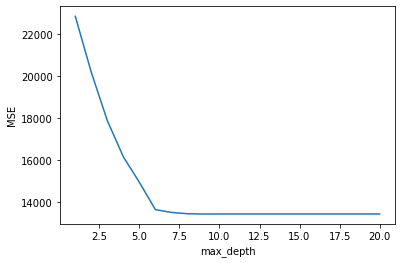

In [12]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [13]:
sorted(zip(mse_scores, max_depth_range))[0]

(13451.363196184311, 9)

Para el caso de árboles de regresión, se utilizó sklearn. En primer lugar se evaluó el modelo con max_depth=8. Después, para calibrar se realizó un ciclo para probar diferentes niveles para este parámetro y se determinó cuál fue el menor mse. En este caso, el menor mse se encontró en un valor de 13451, con un max_depth=9. Si bien este mse es mayor que el del punto anterior hay que mencionar que no son comparables debido a que el punto 4 era un modelo de clasificación, mientras que en el segundo se tiene un problema de regresión.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [14]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [15]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [20]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [22]:
from sklearn.tree import DecisionTreeClassifier
max_depth_range = range(1, 21)
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

print(sorted(zip(accuracy_scores, max_depth_range))[::-1][0])

(0.6308888888888888, 2)


Text(0, 0.5, 'Accuracy')

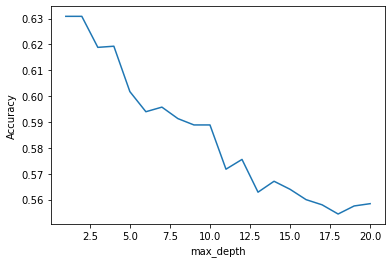

In [23]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [24]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

    
    
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Árboles de decisión")
print("Accuracy:", tree.score(X_test, y_test))
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
f1 = f1_score(y_test, y_pred)

y_pred = tree.predict(X_test)
print("Regresión logística")
print("Accuracy:", accuracy)
print("F1 score:", f1)

Árboles de decisión
Accuracy: 0.6453333333333333
F1 score: 0.6448598130841121
Regresión logística
Accuracy: 0.6146666666666667
F1 score: 0.6110363391655451


Para mejorar el desempeño del modelo de árboles de decisión, se decidió ajustar el parámetro max_depth, que controla la profundidad máxima del árbol, y se seleccionó el valor que obtuvo el mayor accuracy en el conjunto de validación. Después de este proceso de calibración, se obtuvo un accuracy de 0.64, lo que significa que el modelo clasificó correctamente el 64% de las muestras en el conjunto de datos. El F1 también fue de 0.64, lo que indica un buen equilibrio entre precisión y exhaustividad.

Es importante destacar que estas dos medidas de desempeño fueron superiores a las obtenidas para el modelo de regresión logística, lo que sugiere que el modelo de árboles de decisión presenta un mejor desempeño para este problema de clasificación en particular.

Una de las ventajas de los modelos de árboles de decisión es su capacidad para capturar relaciones no lineales y complejas entre las variables de entrada y la variable de salida, lo que puede ser especialmente útil en casos donde la relación entre las variables no es obvia o bien definida. Además, los árboles de decisión son fáciles de interpretar y permiten visualizar de manera clara cómo se toman las decisiones de clasificación.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [26]:
from sklearn import metrics
models = {'dt10': DecisionTreeClassifier(min_samples_leaf=10, random_state=42),
          'dt2': DecisionTreeClassifier(max_depth=2, random_state=42),
          'nb': LogisticRegression()}

for model in models.keys():
    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)
    print(model, metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))

dt10 0.5696969696969697 0.574
dt2 0.6448598130841121 0.6453333333333333
nb 0.6110363391655451 0.6146666666666667


In [27]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10, random_state=42), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6572008113590264, 0.662)

In [28]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, random_state=42), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.631578947368421, 0.6453333333333333)

In [29]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf = BaggingClassifier(base_estimator=LogisticRegression(), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6147596479350035, 0.6206666666666667)

Inicialmente, se construyeron modelos de árboles de decisión con 10 hojas, árboles de decisión con máxima profundidad de 2 y regresión logística para resolver un problema de clasificación. De estos, el modelo de árboles de decisión con máxima profundidad de 2 tuvo el mejor desempeño, con un accuracy de 0.64 y un F1 de igual valor.

Sin embargo, al ensamblar estos modelos mediante votación mayoritaria se presentaron mejoras en las métricas del modelo 1 y del modelo 3, aunque el modelo 2 empeoró levemente. Este resultado sugiere que la combinación de estos modelos puede, en ocasiones, ayudar a mejorar la precisión y la estabilidad de las predicciones.

Después de aplicar la votación mayoritaria, se encontró que el modelo de árboles de decisión con 10 hojas presentó el mejor desempeño, con un accuracy de 0.68 y un F1 de 0.66. El accuracy de 0.68 significa que el modelo clasificó correctamente el 68% de las muestras en el conjunto de datos.

Esta mejora en el desempeño del modelo de árboles de decisión con 10 hojas puede deberse a la combinación de diferentes perspectivas y enfoques de los modelos individuales, lo que permite obtener un modelo más completo y robusto. Además, la votación mayoritaria permite reducir el riesgo de sobreajuste y aumentar la generalización del modelo a nuevos datos.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [30]:
# Celda 8

from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10, random_state=42), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6289308176100629, 0.646)

In [31]:
# Celda 8

from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, random_state=42), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6324549237170597, 0.6466666666666666)

In [32]:
# Celda 8

from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf = BaggingClassifier(base_estimator=LogisticRegression(), max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6166328600405679, 0.622)

Se realizó una extensión de los modelos del punto 7 a través de un ensamble de votación ponderada, lo que permitió mejorar el desempeño del modelo de árboles de decisión con 2 de profundidad y el modelo de regresión logística en comparación con el caso de votación simple. Sin embargo, el modelo de árboles de decisión con 10 hojas empeoró y presentó valores de 0.63 para la precisión y un F1 de 0.65.

El modelo que presentó el mejor desempeño con votación ponderada fue el de árboles de decisión con máximo de profundidad igual a 2. Esta técnica de ensamble se basa en combinar las predicciones de múltiples modelos para obtener una predicción más precisa y estable.

La votación ponderada consiste en asignar pesos a cada modelo según su desempeño en el conjunto de entrenamiento. De esta manera, los modelos más precisos tendrán un mayor peso en la predicción final. Esto puede ayudar a mejorar la capacidad predictiva del ensamble y evitar que un modelo con desempeño deficiente arrastre el resultado general hacia abajo.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [33]:
# Celda 9

tabla=pd.DataFrame(data=[["Árboles de decisión (min_samples_leaf=10)",0.5696969696969697,0.574],
                        ["Árboles de decisión (max_depth=10)",0.6448598130841121,0.6453333333333333],
                        ["Regresión logística",0.6110363391655451,0.6146666666666667],
                        ["Árboles de decisión VS (min_samples_leaf=10)",0.6572008113590264,0.662],
                        ["Árboles de decisión VS (max_depth=10)",0.631578947368421,0.6453333333333333],
                        ["Regresión logística VS",0.614343707713126,0.62],
                        ["Árboles de decisión VP (min_samples_leaf=10)",0.6289308176100629,0.646],
                        ["Árboles de decisión VP (max_depth=10)",0.6324549237170597,0.6466666666666666],
                        ["Regresión logística VP",0.6159029649595688,0.62]],
                        columns = ["Modelo", "Accuracy", "F1"])
tabla

,Modelo,Accuracy,F1
0,Árboles de decisión (min_samples_leaf=10),0.569697,0.574000
1,Árboles de decisión (max_depth=10),0.644860,0.645333
2,Regresión logística,0.611036,0.614667
3,Árboles de decisión VS (min_samples_leaf=10),0.657201,0.662000
4,Árboles de decisión VS (max_depth=10),0.631579,0.645333
5,Regresión logística VS,0.614344,0.620000
6,Árboles de decisión VP (min_samples_leaf=10),0.628931,0.646000
7,Árboles de decisión VP (max_depth=10),0.632455,0.646667
8,Regresión logística VP,0.615903,0.620000


La tabla muestra el desempeño de los modelos implementados en términos de accuracy y puntaje F1 para el conjunto de datos. A continuación, se presentan algunas observaciones:

- Árboles de decisión con min_samples_leaf=10: Este modelo tiene una precisión de 0.57 y un puntaje F1 de 0.57. Este modelo presenta un rendimiento inferior en comparación con los otros modelos en la tabla.

- Árboles de decisión con max_depth=10: Este modelo tiene una precisión de 0.64 y un puntaje F1 de 0.65. Este modelo tiene un rendimiento ligeramente superior en términos de precisión y puntaje F1, siendo el que presenta el segundo mejor desempeño de la tabla.

- Regresión logística: Este modelo tiene una precisión de 0.61 y un puntaje F1 de 0.61. Tiene un rendimiento moderado en términos de precisión y puntaje F1.

- Árboles de decisión VS (min_samples_leaf=10): Este modelo utiliza un ensamble por votación simple y tiene una precisión de 0.66 y un puntaje F1 de 0.66. Tiene un rendimiento superior al modelo de árboles de decisión con min_samples_leaf=10 y, en general, un rendimiento superior a los demás modelos.

- Árboles de decisión VS (max_depth=10): Este modelo utiliza un ensamble por votación simple y tiene una precisión de 0.63 y un puntaje F1 de 0.65. Este modelo parece tener un rendimiento similar al modelo de árboles de decisión con max_depth=10, empeorando levemente el accuracy.

- Regresión logística VS: Este modelo utiliza un ensamble por votación simple y tiene una precisión de 0.61 y un puntaje F1 de 0.62. Este modelo presenta un rendimiento similar al modelo de regresión logística, con mejoras leves.

- Árboles de decisión VP (min_samples_leaf=10): Este modelo utiliza un ensamble por votación ponderada y tiene una precisión de 0.63 y un puntaje F1 de 0.65. Este modelo parece tener un rendimiento inferior al modelo de árboles de decisión con max_depth=10.

- Árboles de decisión VP (max_depth=10): Este modelo utiliza un ensamble por votación ponderada y tiene una precisión de 0.63 y un puntaje F1 de 0.65. Este modelo parece tener un rendimiento similar al modelo de árboles de decisión con max_depth=10.

- Regresión logística VP: Este modelo utiliza un ensamble por votación ponderada y tiene una precisión de 0.62 y un puntaje F1 de 0.62. Este modelo cuenta con un rendimiento similar al modelo de regresión logística.

En general, los modelos de ensamble por votación parecen tener un rendimiento superior en términos de precisión y puntaje F1 en comparación con los modelos individuales de árboles de decisión y regresión logística. Sin embargo, la precisión y el puntaje F1 varían entre los diferentes modelos de ensamble por votación. Los modelos con ensamble por votación simple otorgaron el mejor resultado al usarse en árboles de decisión con min_samples_leaf=10.

Una posible ventaja de los modelos de árboles de decisión con respecto a la regresión logística es su capacidad para manejar tanto variables numéricas como categóricas y su capacidad para detectar interacciones entre variables a través de las segmentaciones. Sin embargo, estos modelos pueden ser propensos al sobreajuste si se les permite crecer demasiado en profundidad o si se usan conjuntos de datos pequeños. En esta aplicación, esta limitación fue controlada a través de la calibración de los hiperparámetros. Además, los modelos de árboles de decisión individuales pueden ser menos estables que los modelos de ensamble por votación debido a su sensibilidad a pequeñas variaciones en los datos de entrenamiento.

Por otro lado, la regresión logística es un modelo que puede ser fácil de interpretar y analizar, pero puede tener un desempeño limitado en casos en los que las relaciones entre las variables no son lineales. Además, como modelo estadístico está sujeto a una mayor cantidad de supuestos, sobre todo en términos de distribuciones, que garantizan la calidad de sus inferencias, pero que en ocasiones son difíciles de cumplir. 

En cuanto a los modelos de ensamble por votación, una posible ventaja es que combinan la salida de varios modelos individuales para mejorar la precisión y estabilidad. Los modelos de ensamble por votación simple pueden ser más fáciles de interpretar que los modelos de ensamble por votación ponderada, ya que cada modelo individual tiene el mismo peso en la votación. Sin embargo, los modelos de ensamble por votación ponderada pueden mejorar aún más el rendimiento al asignar diferentes pesos a los modelos individuales según su rendimiento en el conjunto de datos, aunque en esta aplicación no fue el caso, encontrándose el mejor modelo en la votación simple.